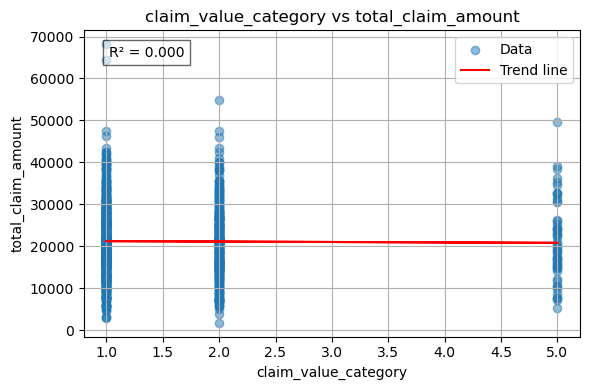

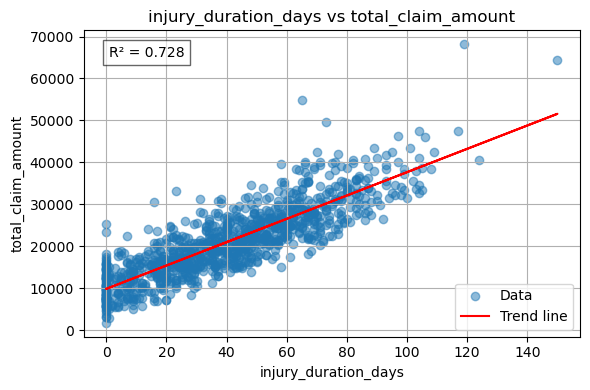

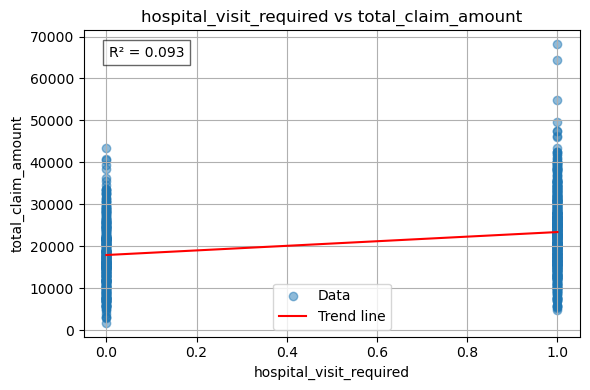

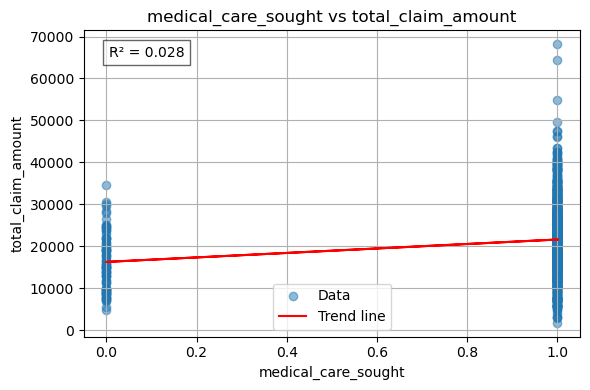

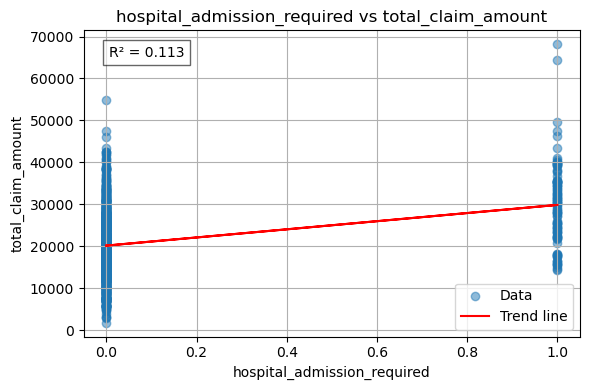

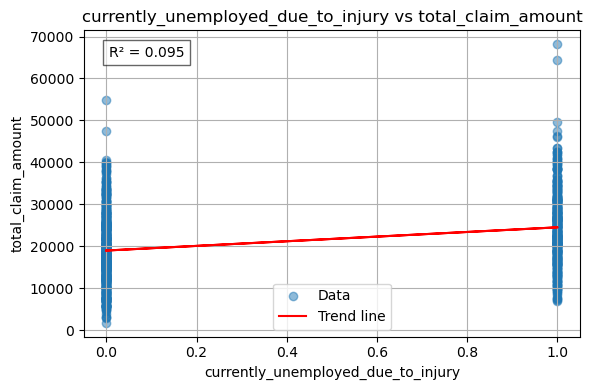

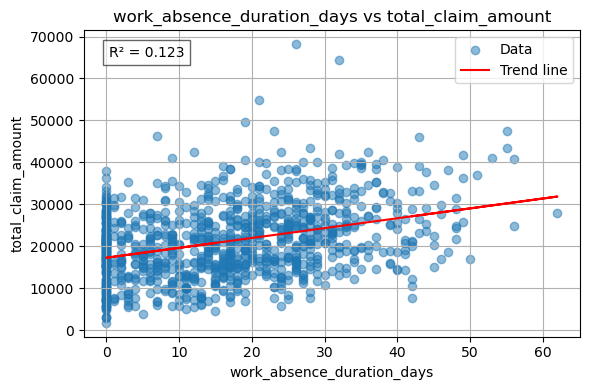

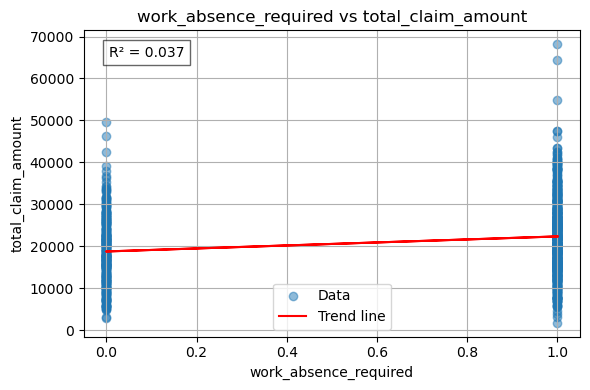

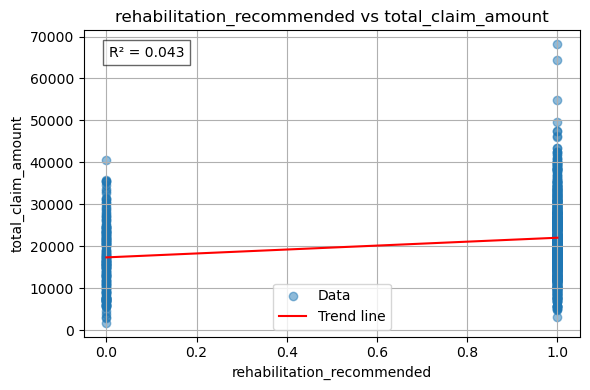

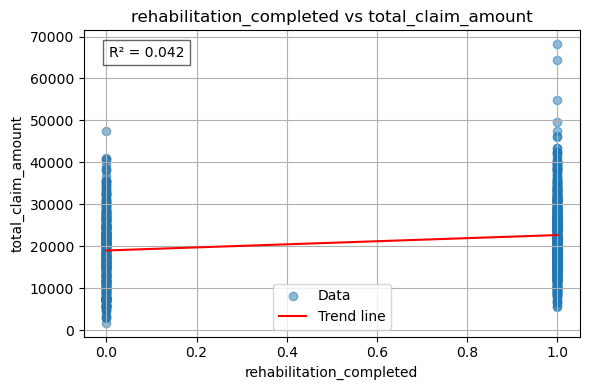

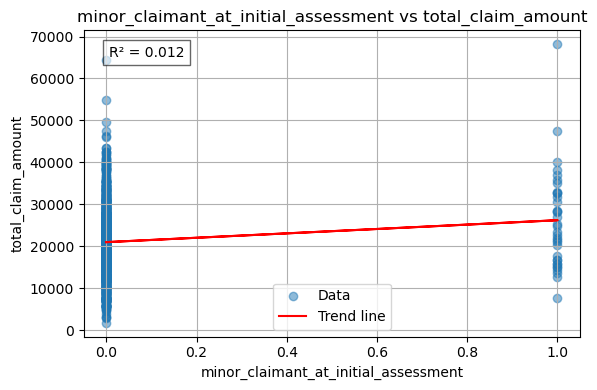

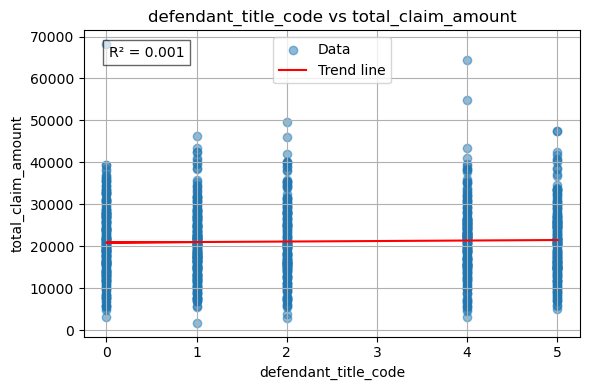

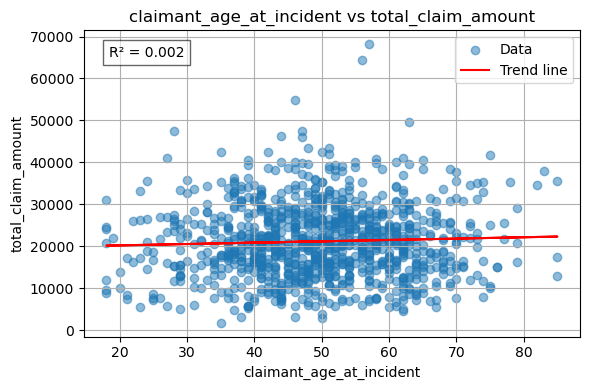

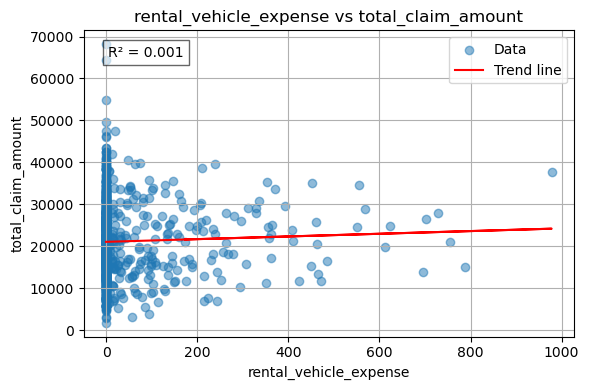

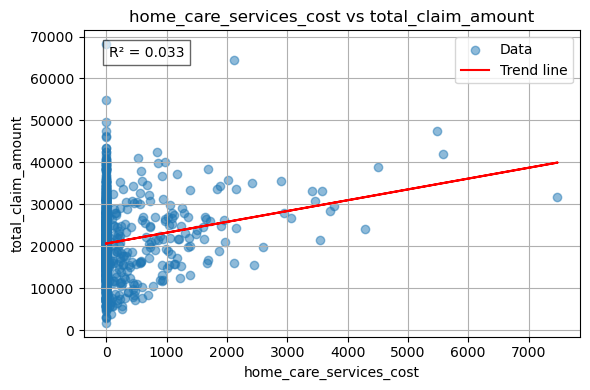

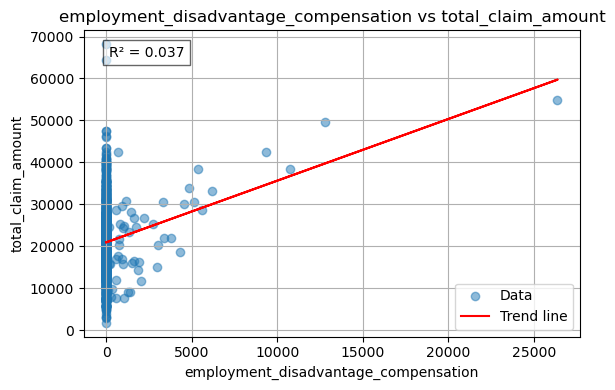

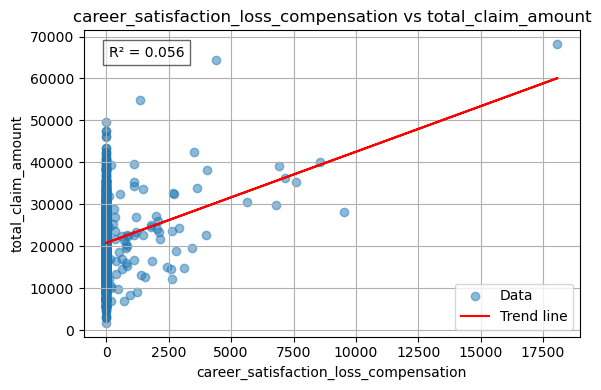

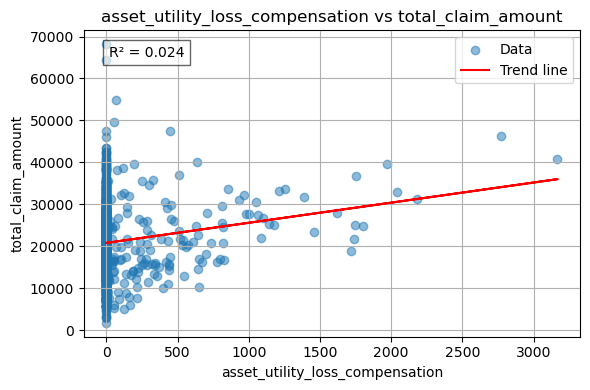

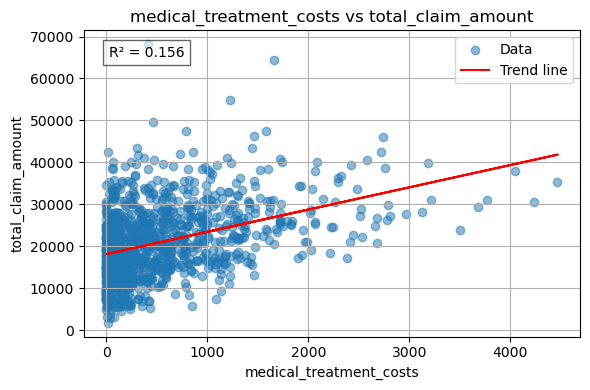

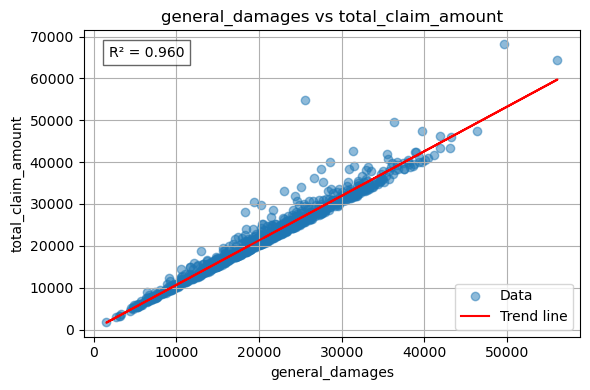

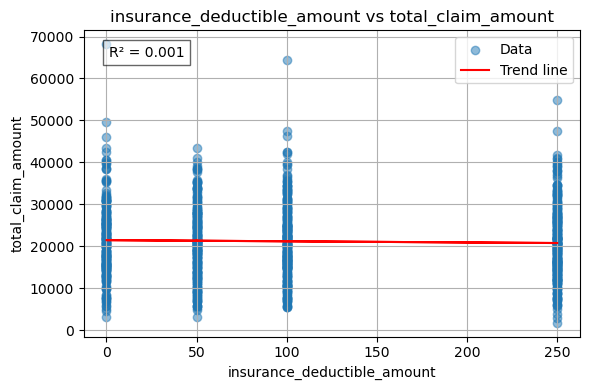

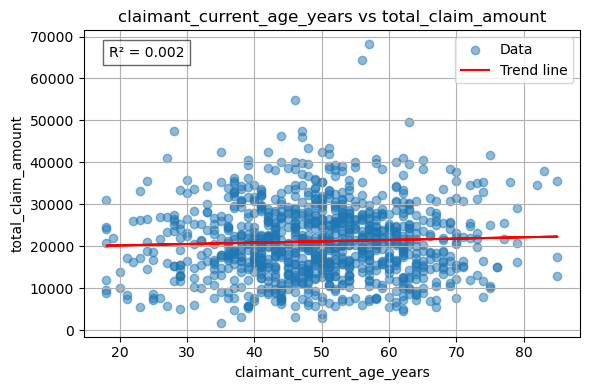

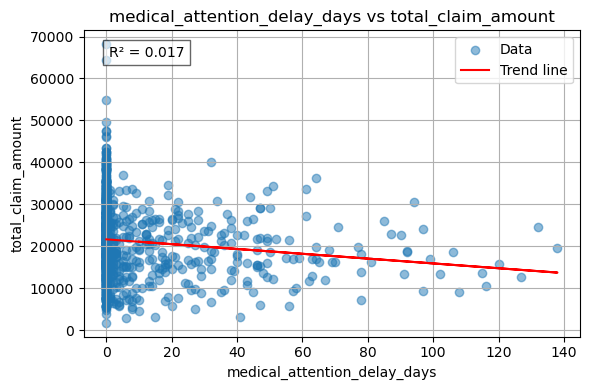

In [2]:
"""
Created on Thu Nov  6 21:55:04 2025

@author: afost
"""
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = r"C:\Users\afost\OneDrive\Desktop\Master in Fintech\Python\motor_insurance_recovery.csv"
df = pd.read_csv(file_path)

# Identify numeric columns (excluding 'client_id' and 'total_claim_amount')
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols.remove('client_id')
target = 'total_claim_amount'

# Create scatter plots with trend lines and R²
for col in numeric_cols:
    if col != target:
        x = df[col]
        y = df[target]

        # Fit a linear trend line
        m, b = np.polyfit(x, y, 1)
        trend = m * x + b

        # Calculate R²
        correlation_matrix = np.corrcoef(x, y)
        correlation_xy = correlation_matrix[0, 1]
        r_squared = correlation_xy**2

        # Plot
        plt.figure(figsize=(6, 4))
        plt.scatter(x, y, alpha=0.5, label='Data')
        plt.plot(x, trend, color='red', label='Trend line')
        plt.xlabel(col)
        plt.ylabel(target)
        plt.title(f"{col} vs {target}")
        plt.text(0.05, 0.95, f"R² = {r_squared:.3f}", transform=plt.gca().transAxes,
                 fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.6))
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
